In [1]:
import os
import pandas as pd
import seaborn as sns
import random
from datetime import datetime, date

In [2]:
data_folder = '../03.clean-data/'

In [3]:
hpi = pd.read_csv(os.path.join(data_folder, 'hpi.csv'), parse_dates=['Date'])

In [4]:
sample_table = (
    hpi
        [hpi['Area'].isin(['Toronto C10', 'Mississauga', 'Milton']) & (hpi['Date'] > pd.to_datetime(date(2020, 5, 1)))]
        .pivot_table(index=['Date'], columns=['Area', 'Type'], values=['HPI'])
)
sample_table.T

Date                                    2020-06-01  2020-07-01  2020-08-01  \
    Area        Type                                                         
HPI Milton      Apartment                    287.6       289.8       290.9   
                Composite                    289.5       285.5       289.1   
                Single-Family Attached       303.2       297.4       303.4   
                Single-Family Detached       283.2       284.7       287.9   
                Townhouse                    291.9       302.8       309.3   
    Mississauga Apartment                    307.2       308.5       309.4   
                Composite                    287.4       291.1       294.3   
                Single-Family Attached       275.3       280.0       285.2   
                Single-Family Detached       273.5       278.5       282.9   
                Townhouse                    288.2       294.7       298.8   
    Toronto C10 Apartment                    315.5       307.4       306.7   
                Composite                    299.4       298.5       297.8   
                Single-Family Attached       254.0       271.8       272.2   
                Single-Family Detached       265.6       283.1       282.1   
                Townhouse                    279.9       279.1       281.8   

Date                                    2020-09-01  2020-10-01  2020-11-01  \
    Area        Type                                                         
HPI Milton      Apartment                    287.8       288.9       288.7   
                Composite                    294.5       297.8       301.7   
                Single-Family Attached       308.9       314.2       320.5   
                Single-Family Detached       294.2       297.5       301.8   
                Townhouse                    319.3       317.3       319.9   
    Mississauga Apartment                    310.6       308.0       307.1   
                Composite                    296.0       295.8       296.2   
                Single-Family Attached       288.0       290.1       292.4   
                Single-Family Detached       285.8       287.3       288.8   
                Townhouse                    298.8       298.0       297.9   
    Toronto C10 Apartment                    305.6       302.1       305.0   
                Composite                    295.6       292.7       295.7   
                Single-Family Attached       266.5       262.9       269.3   
                Single-Family Detached       277.2       275.0       278.2   
                Townhouse                    277.0       282.5       282.2   

Date                                    2020-12-01  2021-01-01  2021-02-01  \
    Area        Type                                                         
HPI Milton      Apartment                      NaN       292.4       298.8   
                Composite                      NaN       325.5       341.9   
                Single-Family Attached         NaN       349.1       367.8   
                Single-Family Detached         NaN       329.3       346.5   
                Townhouse                      NaN       324.5       344.2   
    Mississauga Apartment                    303.0       302.6       309.2   
                Composite                    296.9       301.5       313.8   
                Single-Family Attached       295.7       302.7       320.1   
                Single-Family Detached       292.3       300.0       316.3   
                Townhouse                    299.2       301.8       312.7   
    Toronto C10 Apartment                    303.0       298.9       305.6   
                Composite                    294.0       293.3       300.5   
                Single-Family Attached       269.4       279.0       287.9   
                Single-Family Detached       277.1       287.3       295.6   
                Townhouse                    279.0       266.5       272.5   

Date               

In [5]:
print(sample_table.T.to_latex(escape=False))

\begin{tabular}{lllrrrrrrrrrrr}
\toprule
    &             & Date &  2020-06-01 &  2020-07-01 &  2020-08-01 &  2020-09-01 &  2020-10-01 &  2020-11-01 &  2020-12-01 &  2021-01-01 &  2021-02-01 &  2021-03-01 &  2021-04-01 \\
{} & Area & Type &             &             &             &             &             &             &             &             &             &             &             \\
\midrule
HPI & Milton & Apartment &       287.6 &       289.8 &       290.9 &       287.8 &       288.9 &       288.7 &         NaN &       292.4 &       298.8 &       306.6 &       320.2 \\
    &             & Composite &       289.5 &       285.5 &       289.1 &       294.5 &       297.8 &       301.7 &         NaN &       325.5 &       341.9 &       346.0 &       347.6 \\
    &             & Single-Family Attached &       303.2 &       297.4 &       303.4 &       308.9 &       314.2 &       320.5 &         NaN &       349.1 &       367.8 &       368.1 &       369.0 \\
    &             & Singl

## Aggregate Visualizations

In [6]:
# Housing Types
housing_types = hpi['Type'].unique().tolist()
housing_types

['Single-Family Attached',
 'Single-Family Detached',
 'Townhouse',
 'Apartment',
 'Composite']

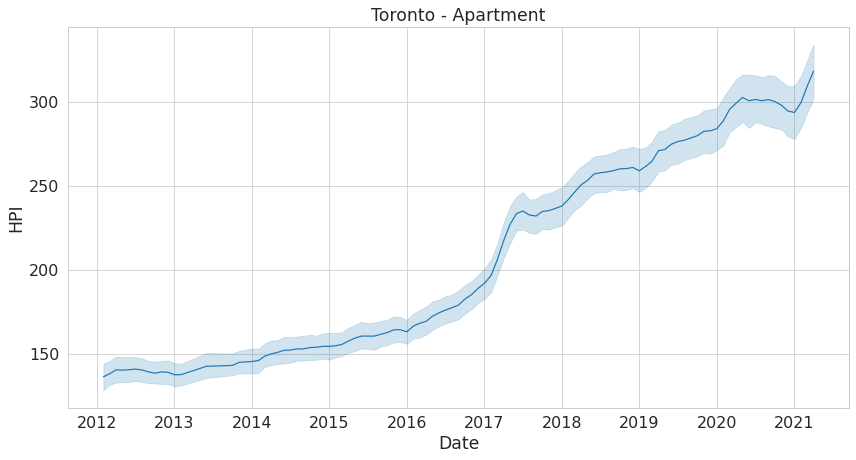

In [7]:
random_housing_type = random.choice(housing_types)
housing_type = random_housing_type
housing_type = 'Apartment'
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Type'] == housing_type) & hpi['Area'].str.startswith('Toronto') & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"Toronto - {housing_type}")
        fig = ax.get_figure()

## Random Area Visualization

In [8]:
areas = hpi['Area'].unique().tolist()
print(areas)

['Burlington', 'Halton Hills', 'Milton', 'Oakville', 'Brampton', 'Mississauga', 'Aurora', 'East Gwillimbury', 'Georgina', 'Markham', 'Newmarket', 'Richmond Hill', 'Vaughan', 'Whitchurch-Stouffville', 'Ajax', 'Clarington', 'Oshawa', 'Pickering', 'Scugog', 'Uxbridge', 'Whitby', 'Orangeville', 'Adjala-Tosorontio', 'Innisfil', 'New Tecumseth', 'TREB Total', 'Toronto W01', 'Toronto W02', 'Toronto W03', 'Toronto W04', 'Toronto W05', 'Toronto W06', 'Toronto W07', 'Toronto W08', 'Toronto W09', 'Toronto W10', 'Toronto C01', 'Toronto C02', 'Toronto C03', 'Toronto C04', 'Toronto C06', 'Toronto C07', 'Toronto C08', 'Toronto C09', 'Toronto C10', 'Toronto C11', 'Toronto C12', 'Toronto C13', 'Toronto C14', 'Toronto C15', 'Toronto E01', 'Toronto E02', 'Toronto E03', 'Toronto E04', 'Toronto E05', 'Toronto E06', 'Toronto E07', 'Toronto E08', 'Toronto E09', 'Toronto E10', 'Toronto E11']


In [9]:
random_area = random.choice(areas)
random_housing_type = random.choice(housing_types)
area = random_area
housing_type = random_housing_type
# area = 'Toronto C10'
# housing_type = 'Apartment'
# area = 'Toronto W02'
# housing_type = 'Townhouse'
area = 'Toronto C01'
housing_type = 'Single-Family Detached'

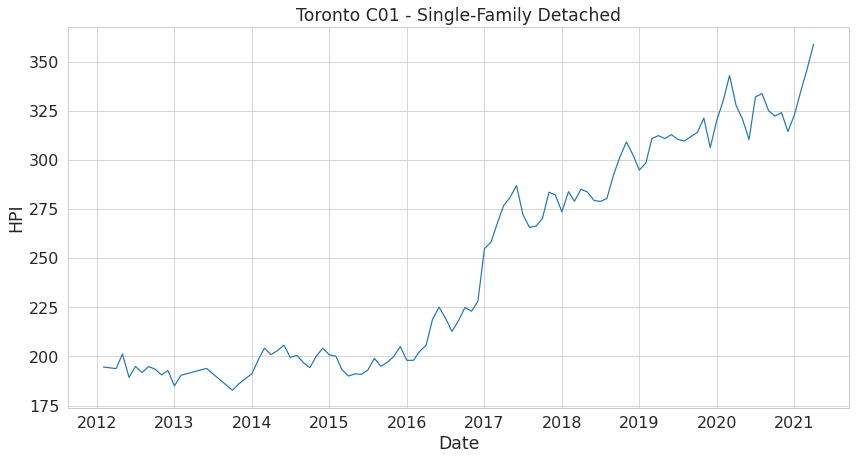

In [10]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Type'] == housing_type) & (hpi['Area'] == area) & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"{area} - {housing_type}")
        fig = ax.get_figure()

In [11]:
random_area = random.choice(areas)
area = random_area
area = 'TREB Total'

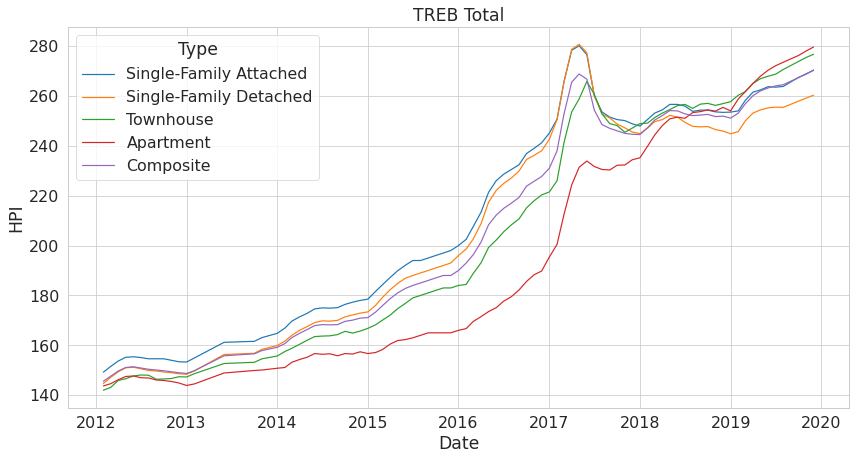

In [12]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Area'] == area) & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            hue='Type',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"{area}")
        fig = ax.get_figure()

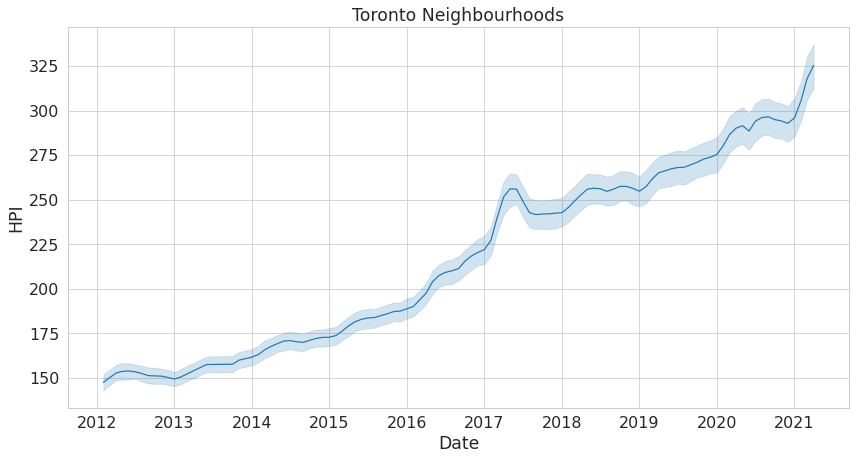

In [13]:
with sns.plotting_context("paper", font_scale=1.8):
    with sns.axes_style("whitegrid"):
        ax = sns.lineplot(
            data=hpi[(hpi['Area'].str.startswith('Toronto')) & (hpi['Type'] == 'Composite') & (hpi['Date'] > datetime(2012, 1, 1))],
            x='Date',
            y='HPI',
            estimator='mean'
        )
        ax.figure.set_figwidth(14)
        ax.figure.set_figheight(7)
        ax.set_title(f"Toronto Neighbourhoods")
        fig = ax.get_figure()

## Check for NULL values

In [14]:
hpi['HPI'].isnull().sum()

1695

In [15]:
hpi[hpi['Area'].str.startswith('Toronto')]['HPI'].isnull().sum()

365

In [16]:
# Toronto areas have full data for Single-Family houses & Apartment units.
(hpi
     [hpi['Area'].str.startswith('Toronto') & (hpi['Type'].isin(['Composite', 'Single-Family Attached', 'Single-Family Detached', 'Apartment']))]
     ['HPI']
     .isnull()
     .sum()
)

0

In [17]:
hpi[hpi['Type'].str.startswith('Single-Family')]['HPI'].isnull().sum()

79

In [18]:
hpi[hpi['Type'] == 'Composite']['HPI'].isnull().sum()

3

In [19]:
hpi[hpi['HPI'].isnull() & (hpi['Type'] == 'Composite')]

,index,Area,Date,Type,HPI
8102,126,Milton,2020-12-01,Composite,NaN
8240,157,Clarington,2021-01-01,Composite,NaN
8492,150,Pickering,2021-03-01,Composite,NaN


In [20]:
hpi[hpi['HPI'].isnull() & (hpi['Type'] == 'Composite') & (~hpi['Area'].isin(['Caledon', 'King']))]

,index,Area,Date,Type,HPI
8102,126,Milton,2020-12-01,Composite,NaN
8240,157,Clarington,2021-01-01,Composite,NaN
8492,150,Pickering,2021-03-01,Composite,NaN


## Check Granularity / Check for Duplicated Data

In [21]:
len(hpi), len(hpi.drop_duplicates(['Area', 'Type', 'Date']))

(27085, 27085)

In [22]:
hpi[hpi.duplicated(['Area', 'Type', 'Date'])]

,index,Area,Date,Type,HPI


## Additional Checks and Explorations

In [23]:
# How many pairs of area and housing type do we have?
len(hpi.drop_duplicates(['Area', 'Type']))

305

In [24]:
# What is the minimum, maximum and average number of data points for each pair of area and housing type?
hpi.groupby(['Area', 'Type']).apply(len).describe()

count    305.000000
mean      88.803279
std       16.653216
min       69.000000
25%       69.000000
50%      103.000000
75%      103.000000
max      103.000000
dtype: float64

In [25]:
# What is the nunmber of months for each pair of area and housing type?
with pd.option_context('max_rows', None):
    display(hpi.groupby(['Area', 'Type'])['Date'].apply(lambda x: (x.dt.to_period('M').max() - x.dt.to_period('M').min())))

Area                    Type                  
Adjala-Tosorontio       Apartment                  <69 * MonthEnds>
                        Composite                  <69 * MonthEnds>
                        Single-Family Attached     <69 * MonthEnds>
                        Single-Family Detached     <69 * MonthEnds>
                        Townhouse                  <69 * MonthEnds>
Ajax                    Apartment                  <69 * MonthEnds>
                        Composite                  <69 * MonthEnds>
                        Single-Family Attached     <69 * MonthEnds>
                        Single-Family Detached     <69 * MonthEnds>
                        Townhouse                  <69 * MonthEnds>
Aurora                  Apartment                  <69 * MonthEnds>
                        Composite                  <69 * MonthEnds>
                        Single-Family Attached     <69 * MonthEnds>
                        Single-Family Detached     <69 * MonthEnds>
 

In [26]:
# What is the minimum date for each pair of area and housing type?
with pd.option_context('max_rows', None):
    display(hpi.groupby(['Area', 'Type'])['Date'].apply(min))

Area                    Type                  
Adjala-Tosorontio       Apartment                2015-07-01
                        Composite                2015-07-01
                        Single-Family Attached   2015-07-01
                        Single-Family Detached   2015-07-01
                        Townhouse                2015-07-01
Ajax                    Apartment                2015-07-01
                        Composite                2015-07-01
                        Single-Family Attached   2015-07-01
                        Single-Family Detached   2015-07-01
                        Townhouse                2015-07-01
Aurora                  Apartment                2015-07-01
                        Composite                2015-07-01
                        Single-Family Attached   2015-07-01
                        Single-Family Detached   2015-07-01
                        Townhouse                2015-07-01
Brampton                Apartment                2015